In [30]:
import os
import numpy as np
import nibabel as nib
from scipy.stats import scoreatpercentile, linregress
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from scipy import stats
from statsmodels.stats.multitest import multipletests

# Functions

In [2]:
patientsASL_interictal = ["sub-patient002","sub-patient003","sub-patient005","sub-patient006","sub-patient007","sub-patient008","sub-patient009","sub-patient012","sub-patient013","sub-patient034","sub-patient038","sub-patient041","sub-patient043","sub-patient045"]
patientsASL_preictal = ["sub-patient005","sub-patient006","sub-patient008","sub-patient009","sub-patient013", "sub-patient034","sub-patient038","sub-patient041","sub-patient043","sub-patient045"]
patientsASL_ictal = ["sub-patient001","sub-patient003","sub-patient004","sub-patient005","sub-patient006","sub-patient013","sub-patient034","sub-patient038","sub-patient041","sub-patient045","sub-patient052"]
patientsASL_postictal = ["sub-patient003","sub-patient005","sub-patient006","sub-patient008","sub-patient009","sub-patient012","sub-patient034", "sub-patient038","sub-patient041", "sub-patient043","sub-patient045"]

patientsCVR_interictal = ["sub-patient013","sub-patient034","sub-patient038","sub-patient041","sub-patient043","sub-patient045"]
patientsCVR_preictal = ["sub-patient013","sub-patient034","sub-patient038","sub-patient041","sub-patient043","sub-patient045"]
patientsCVR_ictal = ["sub-patient013","sub-patient034","sub-patient038","sub-patient041","sub-patient045","sub-patient052"] # !!! SUB-PATIENT004 NOT INCLUDED FOR NOW
patientsCVR_postictal = ["sub-patient034","sub-patient038","sub-patient041","sub-patient043","sub-patient045"]

ASLcontrols_midcycle = ["sub-control019","sub-control020","sub-control025","sub-control026","sub-control027","sub-control028","sub-control029","sub-control030","sub-control031","sub-control033","sub-control044","sub-control046","sub-control048","sub-control049","sub-control051"]
ASLcontrols_premens = ["sub-control019","sub-control020","sub-control025","sub-control026","sub-control027","sub-control028","sub-control029","sub-control030","sub-control031","sub-control033","sub-control044","sub-control046","sub-control048","sub-control049","sub-control051"]

CVRcontrols_midcycle = ["sub-control019","sub-control020","sub-control025","sub-control026","sub-control027","sub-control028","sub-control029","sub-control030","sub-control033","sub-control046","sub-control048","sub-control051"]
CVRcontrols_premens = ["sub-control019","sub-control020","sub-control025","sub-control026","sub-control027","sub-control028","sub-control029","sub-control030","sub-control031","sub-control033","sub-control044","sub-control046","sub-control048","sub-control051"]

## Calculate values

In [3]:
def roi_vasc(patientlist, ses,vasclabel):

    all_hypothal = []
    all_aPHG = []
    all_pPHG = []
    all_acc = []
    all_mcc = []
    all_pcc = []
    all_insula = []
    all_mfg = []
    all_lg = []
    all_cb = []
    all_fg = []
    all_OIL = []
    all_OIR = []
    all_OML = []
    all_OMR = []
    all_Ramyg = []
    all_Lamyg = []
    all_Rthal = []
    all_Lthal = []
    all_brainstem = []
    all_Rputamen = []
    all_Lputamen = []



    # atlas rois path

    hypothal_path = "/home/bpereira/anat/hth_thr_bin.nii"
    aPHG_path = "/home/bpereira/anat/atlas_ROIs/harvardoxford-cortical_anterior_parahippocampal-gyrus_bin.nii.gz"
    pPHG_path = "/home/bpereira/anat/atlas_ROIs/harvardoxford-cortical_posterior_parahippocampal-gyrus_bin.nii.gz"
    acc_path = "/home/bpereira/anat/AAL116_CingAnt_bin.nii.gz"
    mcc_path = "/home/bpereira/anat/AAL116_CingMid_bin.nii.gz"
    pcc_path = "/home/bpereira/anat/AAL116_CingPost_bin.nii.gz"
    #ofg_path = "/home/bpereira/anat/atlas_ROIs/harvardoxford-cortical_occipital-fusiform-gyrus_bin.nii.gz"
    insula_path = "/home/bpereira/anat/atlas_ROIs/harvardoxford-cortical_insular-cortex_bin.nii.gz"
    mfg_path = "/home/bpereira/anat/atlas_ROIs/harvardoxford-cortical_middle-frontal-gyrus_bin.nii.gz"
    lg_path = "/home/bpereira/anat/atlas_ROIs/harvardoxford-cortical_lingual-gyrus_bin.nii.gz"
    cb_path = "/home/bpereira/anat/atlas_ROIs/mni_cerebellum_bin.nii.gz"
    fg_path = "/home/bpereira/anat/AAL116_Fusiform_bin.nii.gz"
    OIL_path = "/home/bpereira/anat/AAL116_Occipital_InfL_bin.nii.gz"
    OIR_path = "/home/bpereira/anat/AAL116_Occipital_InfR_bin.nii.gz"
    OML_path = "/home/bpereira/anat/AAL116_Occipital_MidL_bin.nii.gz"
    OMR_path = "/home/bpereira/anat/AAL116_Occipital_MidR_bin.nii.gz"

    hypothalmask = nib.load(hypothal_path).get_fdata().flatten()
    aPHGmask = nib.load(aPHG_path).get_fdata().flatten()
    pPHGmask = nib.load(pPHG_path).get_fdata().flatten()
    accmask = nib.load(acc_path).get_fdata().flatten()
    mccmask = nib.load(mcc_path).get_fdata().flatten()
    pccmask = nib.load(pcc_path).get_fdata().flatten()
    #ofgmask = nib.load(ofg_path).get_fdata().flatten() not using OFG
    insulamask = nib.load(insula_path).get_fdata().flatten()
    mfgmask = nib.load(mfg_path).get_fdata().flatten()
    lgmask = nib.load(lg_path).get_fdata().flatten()
    cbmask = nib.load(cb_path).get_fdata().flatten()
    fgmask = nib.load(fg_path).get_fdata().flatten()
    OILmask = nib.load(OIL_path).get_fdata().flatten()
    OIRmask = nib.load(OIR_path).get_fdata().flatten()
    OMLmask = nib.load(OML_path).get_fdata().flatten()
    OMRmask = nib.load(OMR_path).get_fdata().flatten()

    for sub in patientlist:

        if vasclabel=='ASL':
            vasc_path = os.path.join("/home/mig_n2treatdata/derivatives/perf-preproc/",sub,ses,"smoothed8_perfusion_MNI.nii")
        else:
            vasc_path = os.path.join("/home/mig_n2treatdata/derivatives/func-preproc/func-task_breathhold/",sub,ses,"smoothed8_CVR_single_delay6_deltapet_thrvar_MNI.nii")

        vascnii = nib.load(vasc_path)
        vasc = vascnii.get_fdata().flatten()

        # first to MNI roi paths
        
        Ramygmask_path = os.path.join("/home/bpereira/anat/",sub,"FIRST/RamygdalaMNI_bin.nii.gz")
        Lamygmask_path = os.path.join("/home/bpereira/anat/",sub,"FIRST/LamygdalaMNI_bin.nii.gz")
        Rthal_path = os.path.join("/home/bpereira/anat/",sub,"FIRST/RthalamusMNI_bin.nii.gz")
        Lthal_path = os.path.join("/home/bpereira/anat/",sub,"FIRST/LthalamusMNI_bin.nii.gz")
        brainstem_path = os.path.join("/home/bpereira/anat/",sub,"FIRST/brainstemMNI_bin.nii.gz")
        Rputamen_path = os.path.join("/home/bpereira/anat/",sub,"FIRST/RputamenMNI_bin.nii.gz")
        Lputamen_path = os.path.join("/home/bpereira/anat/",sub,"FIRST/LputamenMNI_bin.nii.gz")

        Ramygmask = nib.load(Ramygmask_path).get_fdata().flatten()
        Lamygmask = nib.load(Lamygmask_path).get_fdata().flatten()
        Rthalmask = nib.load(Rthal_path).get_fdata().flatten()
        Lthalmask = nib.load(Lthal_path).get_fdata().flatten()
        brainstemmask = nib.load(brainstem_path).get_fdata().flatten()
        Rputamenmask = nib.load(Rputamen_path).get_fdata().flatten()
        Lputamenmask = nib.load(Lputamen_path).get_fdata().flatten()

        hypothal_ind = np.where(hypothalmask == 1)
        aPHG_ind = np.where(aPHGmask == 1)
        pPHG_ind = np.where(pPHGmask == 1)
        acc_ind = np.where(accmask == 1)
        mcc_ind = np.where(mccmask == 1)
        pcc_ind = np.where(pccmask == 1)
        #print(mcc_ind)
        #print(pcc_ind)
        #ofg_ind = np.where(ofgmask == 1)
        insula_ind = np.where(insulamask == 1)
        mfg_ind = np.where(mfgmask == 1)
        lg_ind = np.where(lgmask == 1)
        cb_ind = np.where(cbmask == 1)
        Ramyg_ind = np.where(Ramygmask == 1)
        Lamyg_ind = np.where(Lamygmask == 1)
        Rthal_ind = np.where(Rthalmask == 1)
        Lthal_ind = np.where(Lthalmask == 1)
        brainstem_ind = np.where(brainstemmask == 1)
        Rputamen_ind = np.where(Rputamenmask == 1)
        Lputamen_ind = np.where(Lputamenmask == 1)
        fg_ind = np.where(fgmask == 1)
        OIL_ind = np.where(OILmask == 1)
        OIR_ind = np.where(OIRmask == 1)
        OML_ind = np.where(OMLmask == 1)
        OMR_ind = np.where(OMRmask == 1)

        # remove outliers from vasc maps

        qvasc1 = scoreatpercentile(vasc,1)
        qvasc99 = scoreatpercentile(vasc,99)

        # find index of non outliers

        vasc_non_outliers_ind = np.where((vasc > qvasc1) & (vasc < qvasc99))

        commonvasc_hypothal = np.intersect1d(vasc_non_outliers_ind,hypothal_ind)
        commonvasc_aPHG = np.intersect1d(vasc_non_outliers_ind,aPHG_ind)
        commonvasc_pPHG = np.intersect1d(vasc_non_outliers_ind,pPHG_ind)
        commonvasc_acc = np.intersect1d(vasc_non_outliers_ind,acc_ind)
        commonvasc_mcc = np.intersect1d(vasc_non_outliers_ind,mcc_ind)
        commonvasc_pcc = np.intersect1d(vasc_non_outliers_ind,pcc_ind)
        #print(commonvasc_mcc)
        #print(commonvasc_pcc)
        #commonvasc_ofg = np.intersect1d(vasc_non_outliers_ind,ofg_ind)
        commonvasc_insula = np.intersect1d(vasc_non_outliers_ind,insula_ind)
        commonvasc_mfg = np.intersect1d(vasc_non_outliers_ind,mfg_ind)
        commonvasc_lg = np.intersect1d(vasc_non_outliers_ind,lg_ind)
        commonvasc_cb = np.intersect1d(vasc_non_outliers_ind,cb_ind)
        commonvasc_Ramyg = np.intersect1d(vasc_non_outliers_ind,Ramyg_ind)
        commonvasc_Lamyg = np.intersect1d(vasc_non_outliers_ind,Lamyg_ind)
        commonvasc_Rthal = np.intersect1d(vasc_non_outliers_ind,Rthal_ind)
        commonvasc_Lthal = np.intersect1d(vasc_non_outliers_ind,Lthal_ind)
        commonvasc_brainstem = np.intersect1d(vasc_non_outliers_ind,brainstem_ind)
        commonvasc_Rputamen = np.intersect1d(vasc_non_outliers_ind,Rputamen_ind)
        commonvasc_Lputamen = np.intersect1d(vasc_non_outliers_ind,Lputamen_ind)
        commonvasc_fg = np.intersect1d(vasc_non_outliers_ind,fg_ind)
        commonvasc_OIL = np.intersect1d(vasc_non_outliers_ind,OIL_ind)
        commonvasc_OIR = np.intersect1d(vasc_non_outliers_ind,OIR_ind)
        commonvasc_OML = np.intersect1d(vasc_non_outliers_ind,OML_ind)
        commonvasc_OMR = np.intersect1d(vasc_non_outliers_ind,OMR_ind)

         # mean within each roi
        
        meanvasc_hypothal = np.mean(vasc[commonvasc_hypothal])
        meanvasc_aPHG = np.mean(vasc[commonvasc_aPHG])
        meanvasc_pPHG = np.mean(vasc[commonvasc_pPHG])
        meanvasc_acc = np.mean(vasc[commonvasc_acc])
        meanvasc_mcc = np.mean(vasc[commonvasc_mcc])
        meanvasc_pcc = np.mean(vasc[commonvasc_pcc])
        #meanvasc_ofg = np.mean(vasc[commonvasc_ofg])
        meanvasc_insula = np.mean(vasc[commonvasc_insula])
        meanvasc_mfg = np.mean(vasc[commonvasc_mfg])
        meanvasc_lg = np.mean(vasc[commonvasc_lg])
        meanvasc_cb = np.mean(vasc[commonvasc_cb])
        meanvasc_Ramyg = np.mean(vasc[commonvasc_Ramyg])
        meanvasc_Lamyg = np.mean(vasc[commonvasc_Lamyg])
        meanvasc_Rthal = np.mean(vasc[commonvasc_Rthal])
        meanvasc_Lthal = np.mean(vasc[commonvasc_Lthal])
        meanvasc_brainstem = np.mean(vasc[commonvasc_brainstem])
        meanvasc_Rputamen = np.mean(vasc[commonvasc_Rputamen])
        meanvasc_Lputamen = np.mean(vasc[commonvasc_Lputamen])
        meanvasc_fg = np.mean(vasc[commonvasc_fg])
        meanvasc_OIL = np.mean(vasc[commonvasc_OIL])
        meanvasc_OIR = np.mean(vasc[commonvasc_OIR])
        meanvasc_OML = np.mean(vasc[commonvasc_OML])
        meanvasc_OMR = np.mean(vasc[commonvasc_OMR])

        all_hypothal += [meanvasc_hypothal]
        all_aPHG += [meanvasc_aPHG]
        all_pPHG += [meanvasc_pPHG]
        all_acc += [meanvasc_acc]
        all_mcc += [meanvasc_mcc]
        all_pcc += [meanvasc_pcc]
        all_insula += [meanvasc_insula]
        all_mfg += [meanvasc_mfg]
        all_lg += [meanvasc_lg]
        all_cb += [meanvasc_cb]
        all_Ramyg += [meanvasc_Ramyg]
        all_Lamyg += [meanvasc_Lamyg]
        all_Rthal += [meanvasc_Rthal]
        all_Lthal += [meanvasc_Lthal]
        all_brainstem += [meanvasc_brainstem]
        all_Rputamen += [meanvasc_Rputamen]
        all_Lputamen += [meanvasc_Lputamen]
        all_fg += [meanvasc_fg]
        all_OIL += [meanvasc_OIL]
        all_OIR += [meanvasc_OIR]
        all_OML += [meanvasc_OML]
        all_OMR += [meanvasc_OMR]

    all_vasc = [all_hypothal,all_aPHG,all_pPHG,all_acc,all_mcc,all_pcc,all_insula,all_mfg,all_lg,all_cb,all_Ramyg,all_Lamyg,all_Rthal,all_Lthal, all_brainstem, all_Rputamen, all_Lputamen, all_fg, all_OIL, all_OIR,all_OML,all_OMR]

    return all_vasc







## Plots

In [4]:
def plot_boxplot(data, ROIname, vasclabel):
    """
    Plot a boxplot with significance markers.

    Args:
        data (list): List of data arrays for boxplot.
        ROIname (string): Name of the ROI.

    Returns:
        None
    """
    positions = [1, 2, 3, 4, 5, 6]
    phase_names = ['Midcycle', 'Premenstrual', 'Interictal', 'Preictal', 'Ictal', 'Postictal']

    # Create the boxplot with equal width
    boxprops_green = dict(color="lightgreen", facecolor="lightgreen", linewidth=2)
    boxprops_red = dict(color="lightcoral", facecolor="lightcoral", linewidth=2)
    medianprops_black = dict(color="black", linewidth=2)

    plt.boxplot(data[:-2], positions=positions[:-2], patch_artist=True, boxprops=boxprops_green, medianprops=medianprops_black, widths=0.5)
    plt.boxplot(data[-4:], positions=positions[-4:], patch_artist=True, boxprops=boxprops_red, medianprops=medianprops_black, widths=0.5)

    # Set x-axis labels
    plt.xticks(positions, phase_names, fontsize=8)

    plt.ylabel(f'{vasclabel}')
    plt.title(f'{vasclabel} {ROIname}')

    # Adjust the y-coordinate for counts
    y_min, y_max = plt.ylim()  # Get the current y-axis limits
    y_position = y_min - (0.1 * (y_max - y_min))  # Place counts below the x-axis

    for i, single_data in enumerate(data, start=1):
        count = len(single_data)
        plt.text(i, y_position, f'n={count}', ha='center', va='top', fontsize = 8)


    plt.show()

## Stats

In [5]:
from scipy import stats

def all_stats(data, roi_name):
    results = []
    # results is PER ROI


    # Midcycle vs Interictal
    if stats.shapiro(data[0]).pvalue > 0.05 and stats.shapiro(data[2]).pvalue > 0.05:
        midvint = stats.ttest_ind(data[0], data[2])
        results.append(midvint.pvalue)
        print(f"Midcycle vs Interictal for {roi_name}: p-value = {midvint.pvalue:.5f}")
    else:
        midvintwelch = stats.ttest_ind(data[0], data[2], equal_var=False)
        results.append(midvintwelch.pvalue)
        print(f"Midcycle vs Interictal for {roi_name} (Welch): p-value = {midvintwelch.pvalue:.5f}")

    # Premenstrual vs Preictal
    if stats.shapiro(data[1]).pvalue > 0.05 and stats.shapiro(data[3]).pvalue > 0.05:
        premensvpreict = stats.ttest_ind(data[1], data[3])
        results.append(premensvpreict.pvalue)
        print(f"Premenstrual vs Preictal for {roi_name}: p-value = {premensvpreict.pvalue:.5f}")
    else:
        premensvpreictwelch = stats.ttest_ind(data[1], data[3], equal_var=False)
        results.append(premensvpreictwelch.pvalue)
        print(f"Premenstrual vs Preictal for {roi_name} (Welch): p-value = {premensvpreictwelch.pvalue:.5f}")

    # Premenstrual vs Ictal
    if stats.shapiro(data[1]).pvalue > 0.05 and stats.shapiro(data[4]).pvalue > 0.05:
        premensvict = stats.ttest_ind(data[1], data[4])
        results.append(premensvict.pvalue)
        print(f"Premenstrual vs Ictal for {roi_name}: p-value = {premensvict.pvalue:.5f}")
    else:
        premensvictwelch = stats.ttest_ind(data[1], data[4], equal_var=False)
        results.append(premensvictwelch.pvalue)
        print(f"Premenstrual vs Ictal for {roi_name} (Welch): p-value = {premensvictwelch.pvalue:.5f}")

    # Premenstrual vs Postictal
    if stats.shapiro(data[1]).pvalue > 0.05 and stats.shapiro(data[5]).pvalue > 0.05:
        premensvpostict = stats.ttest_ind(data[1], data[5])
        results.append(premensvpostict.pvalue)
        print(f"Premenstrual vs Postictal for {roi_name}: p-value = {premensvpostict.pvalue:.5f}")
    else:
        premensvpostictwelch = stats.ttest_ind(data[1], data[5], equal_var=False)
        results.append(premensvpostictwelch.pvalue)
        print(f"Premenstrual vs Postictal for {roi_name} (Welch): p-value = {premensvpostictwelch.pvalue:.5f}")

    # Midcycle vs Premenstrual
    if stats.shapiro(data[0]).pvalue > 0.05 and stats.shapiro(data[1]).pvalue > 0.05:
        midvpremens = stats.ttest_rel(data[0], data[1])
        results.append(midvpremens.pvalue)
        print(f"Midcycle vs Premenstrual for {roi_name}: p-value = {midvpremens.pvalue:.5f}")
    else:
        midvpremenswilc = stats.wilcoxon(data[0], data[1])
        results.append(midvpremenswilc.pvalue)
        print(f"Midcycle vs Premenstrual for {roi_name} (Wilcoxon): p-value = {midvpremenswilc.pvalue:.5f}")

    return results


In [6]:
from scipy import stats

def all_statsCVR(data, roi_name):
    results = []
    # results is PER ROI


    # Midcycle vs Interictal
    if stats.shapiro(data[0]).pvalue > 0.05 and stats.shapiro(data[2]).pvalue > 0.05:
        midvint = stats.ttest_ind(data[0], data[2])
        results.append(midvint.pvalue)
        print(f"Midcycle vs Interictal for {roi_name}: p-value = {midvint.pvalue:.5f}")
    else:
        midvintwelch = stats.ttest_ind(data[0], data[2], equal_var=False)
        results.append(midvintwelch.pvalue)
        print(f"Midcycle vs Interictal for {roi_name} (Welch): p-value = {midvintwelch.pvalue:.5f}")

    # Premenstrual vs Preictal
    if stats.shapiro(data[1]).pvalue > 0.05 and stats.shapiro(data[3]).pvalue > 0.05:
        premensvpreict = stats.ttest_ind(data[1], data[3])
        results.append(premensvpreict.pvalue)
        print(f"Premenstrual vs Preictal for {roi_name}: p-value = {premensvpreict.pvalue:.5f}")
    else:
        premensvpreictwelch = stats.ttest_ind(data[1], data[3], equal_var=False)
        results.append(premensvpreictwelch.pvalue)
        print(f"Premenstrual vs Preictal for {roi_name} (Welch): p-value = {premensvpreictwelch.pvalue:.5f}")

    # Premenstrual vs Ictal
    if stats.shapiro(data[1]).pvalue > 0.05 and stats.shapiro(data[4]).pvalue > 0.05:
        premensvict = stats.ttest_ind(data[1], data[4])
        results.append(premensvict.pvalue)
        print(f"Premenstrual vs Ictal for {roi_name}: p-value = {premensvict.pvalue:.5f}")
    else:
        premensvictwelch = stats.ttest_ind(data[1], data[4], equal_var=False)
        results.append(premensvictwelch.pvalue)
        print(f"Premenstrual vs Ictal for {roi_name} (Welch): p-value = {premensvictwelch.pvalue:.5f}")

    # Premenstrual vs Postictal
    if stats.shapiro(data[1]).pvalue > 0.05 and stats.shapiro(data[5]).pvalue > 0.05:
        premensvpostict = stats.ttest_ind(data[1], data[5])
        results.append(premensvpostict.pvalue)
        print(f"Premenstrual vs Postictal for {roi_name}: p-value = {premensvpostict.pvalue:.5f}")
    else:
        premensvpostictwelch = stats.ttest_ind(data[1], data[5], equal_var=False)
        results.append(premensvpostictwelch.pvalue)
        print(f"Premenstrual vs Postictal for {roi_name} (Welch): p-value = {premensvpostictwelch.pvalue:.5f}")

    # Midcycle vs Premenstrual
    if stats.shapiro(data[0]).pvalue > 0.05 and stats.shapiro(data[1]).pvalue > 0.05:
        midvpremens = stats.ttest_ind(data[0], data[1]) # ind because not repeated measures for CVR
        results.append(midvpremens.pvalue)
        print(f"Midcycle vs Premenstrual for {roi_name}: p-value = {midvpremens.pvalue:.5f}")
    else:
        midvpremenswelch = stats.ttest_ind(data[0], data[1],equal_var = False)
        results.append(midvpremenswelch.pvalue)
        print(f"Midcycle vs Premenstrual for {roi_name} (Welch): p-value = {midvpremenswelch.pvalue:.5f}")

    return results


In [7]:
def norm_test(ses_list, ROI_names, ses):
    shapiro_results = []
    
    for i in range(len(ses_list)):
        shapiro_test = stats.shapiro(ses_list[i])
        shapiro_results += [shapiro_test]

        if shapiro_test.pvalue < 0.05:
            print(f"ROI {ROI_names[i]} session {ses} does not have normal distribution")
            
    return shapiro_results

In [16]:
def organize_pvalues(list):
    midvint = []
    premvpre = []
    premvict = []
    premvpost = []
    midvprem = []
    for roi in list:
        midvint += [roi[0]]
        premvpre += [roi[1]]
        premvict += [roi[2]]
        premvpost += [roi[3]]
        midvprem += [roi[4]]

    return midvint, premvpre, premvict, premvpost, midvprem
        

In [17]:
def organize_pvaluesalt(pvalues_list):
    midvint, premvpre, premvict, premvpost, midvprem = zip(*pvalues_list)
    return list(midvint), list(premvpre), list(premvict), list(premvpost), list(midvprem)


In [23]:
def is_sig(pvalslist,ROI_names,comp):
    sig_ps = []
    for i in range(len(pvalslist)):
        if pvalslist[i] < 0.05:
            print(f"{comp} is significant in {ROI_names[i]}")
            sig_ps+=[pvalslist[i]]
    return sig_ps


# ASL

In [8]:
allROIsASL_mid = roi_vasc(ASLcontrols_midcycle,"ses-midcycle","ASL")
allROIsASL_premens = roi_vasc(ASLcontrols_premens,"ses-premenstrual","ASL")
allROIsASL_int = roi_vasc(patientsASL_interictal,"ses-interictal","ASL")
allROIsASL_preict = roi_vasc(patientsASL_preictal,"ses-preictal","ASL")
allROIsASL_ict = roi_vasc(patientsASL_ictal,"ses-ictal","ASL")
allROIsASL_postict = roi_vasc(patientsASL_postictal,"ses-postictal","ASL")

In [9]:
ROI_names = ['Hypothalamus',"aPHG","pPHG","ACC","MCC","PCC","Insula","MFG","LG","Cb","Ramyg","Lamyg","Rthal","Lthal","Brainstem","Rputamen","Lputamen","FG","OIL","OIR","OML","OMR"]

## Check normality

In [10]:
mid_norm = norm_test(allROIsASL_mid,ROI_names,"midcycle")
print('-'*10)
premens_norm = norm_test(allROIsASL_premens,ROI_names,"premenstrual")
print('-'*10)
int_norm = norm_test(allROIsASL_int,ROI_names,"interictal")
print('-'*10)
preict_norm = norm_test(allROIsASL_preict,ROI_names,"preictal")
print('-'*10)
ict_norm = norm_test (allROIsASL_ict, ROI_names, "ictal")
print('-'*10)
postict_norm = norm_test(allROIsASL_postict, ROI_names, "postictal")
print('-'*10)


----------
ROI Lamyg session premenstrual does not have normal distribution
ROI Lthal session premenstrual does not have normal distribution
----------
ROI Hypothalamus session interictal does not have normal distribution
ROI Cb session interictal does not have normal distribution
ROI Brainstem session interictal does not have normal distribution
----------
ROI OMR session preictal does not have normal distribution
----------
ROI ACC session ictal does not have normal distribution
----------
ROI Cb session postictal does not have normal distribution
----------


## Results + stats

Midcycle vs Interictal for Hypothalamus (Welch): p-value = 0.62353
Premenstrual vs Preictal for Hypothalamus: p-value = 0.40591
Premenstrual vs Ictal for Hypothalamus: p-value = 0.03552
Premenstrual vs Postictal for Hypothalamus: p-value = 0.15944
Midcycle vs Premenstrual for Hypothalamus: p-value = 0.39402


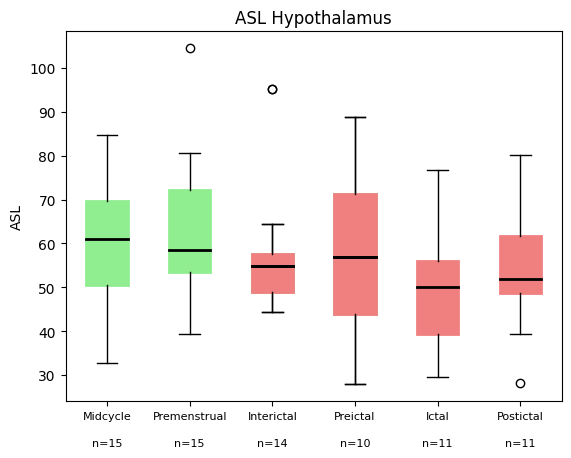

Midcycle vs Interictal for aPHG: p-value = 0.21190
Premenstrual vs Preictal for aPHG: p-value = 0.96517
Premenstrual vs Ictal for aPHG: p-value = 0.13656
Premenstrual vs Postictal for aPHG: p-value = 0.23166
Midcycle vs Premenstrual for aPHG: p-value = 0.53582


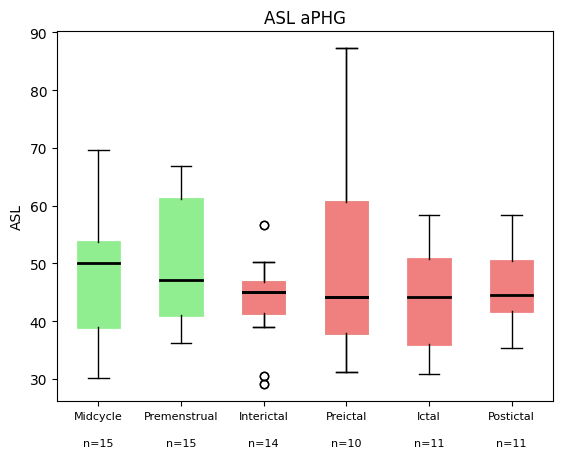

Midcycle vs Interictal for pPHG: p-value = 0.49044
Premenstrual vs Preictal for pPHG: p-value = 0.99328
Premenstrual vs Ictal for pPHG: p-value = 0.10273
Premenstrual vs Postictal for pPHG: p-value = 0.40781
Midcycle vs Premenstrual for pPHG: p-value = 0.42276


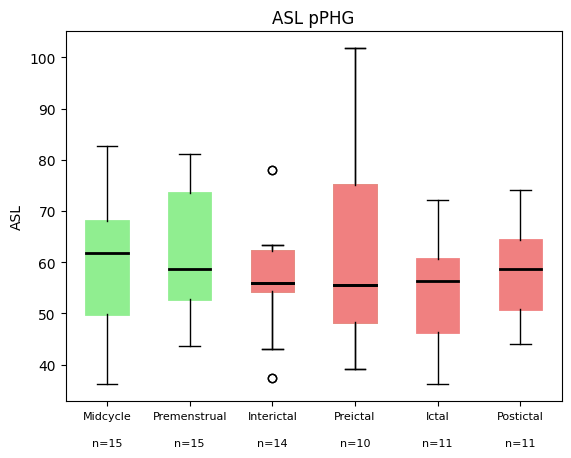

Midcycle vs Interictal for ACC: p-value = 0.27443
Premenstrual vs Preictal for ACC: p-value = 0.49890
Premenstrual vs Ictal for ACC (Welch): p-value = 0.07748
Premenstrual vs Postictal for ACC: p-value = 0.18437
Midcycle vs Premenstrual for ACC: p-value = 0.84391


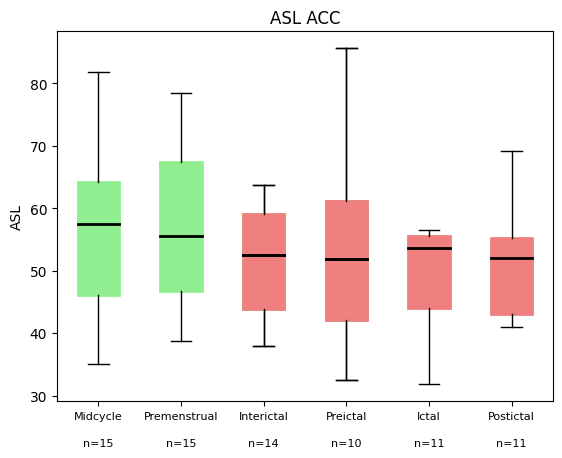

Midcycle vs Interictal for MCC: p-value = 0.21931
Premenstrual vs Preictal for MCC: p-value = 0.63677
Premenstrual vs Ictal for MCC: p-value = 0.09198
Premenstrual vs Postictal for MCC: p-value = 0.27113
Midcycle vs Premenstrual for MCC: p-value = 0.90579


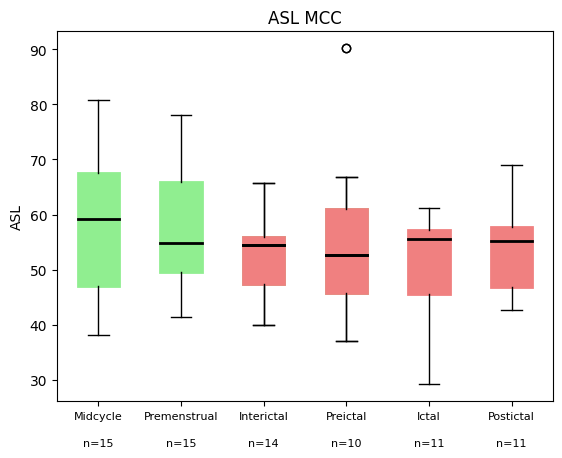

Midcycle vs Interictal for PCC: p-value = 0.48104
Premenstrual vs Preictal for PCC: p-value = 0.86412
Premenstrual vs Ictal for PCC: p-value = 0.15130
Premenstrual vs Postictal for PCC: p-value = 0.55822
Midcycle vs Premenstrual for PCC: p-value = 0.64959


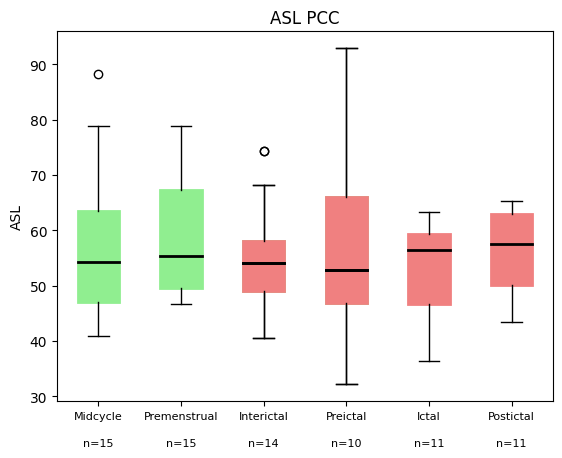

Midcycle vs Interictal for Insula: p-value = 0.45477
Premenstrual vs Preictal for Insula: p-value = 0.60818
Premenstrual vs Ictal for Insula: p-value = 0.12256
Premenstrual vs Postictal for Insula: p-value = 0.16881
Midcycle vs Premenstrual for Insula: p-value = 0.43162


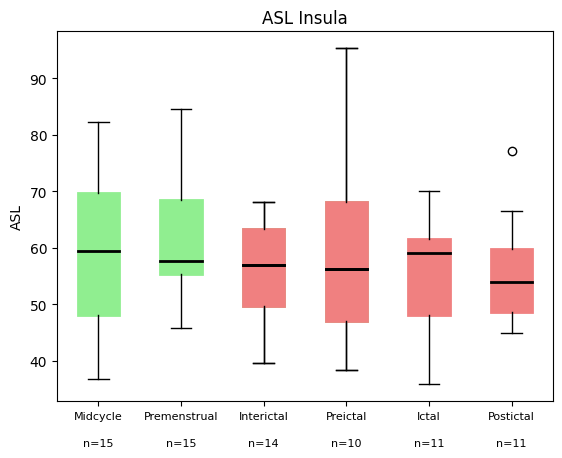

Midcycle vs Interictal for MFG: p-value = 0.26783
Premenstrual vs Preictal for MFG: p-value = 0.94593
Premenstrual vs Ictal for MFG: p-value = 0.04729
Premenstrual vs Postictal for MFG: p-value = 0.56898
Midcycle vs Premenstrual for MFG: p-value = 0.88813


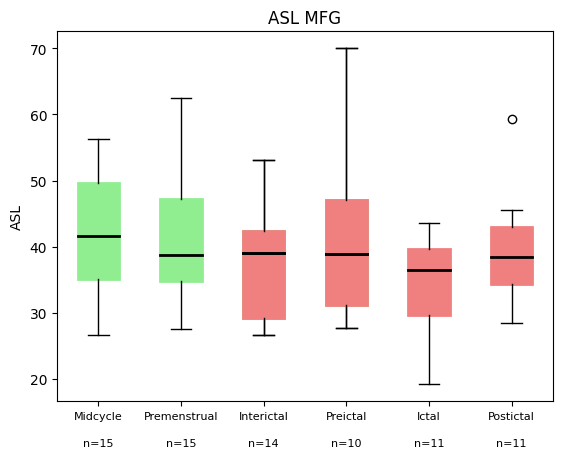

Midcycle vs Interictal for LG: p-value = 0.53821
Premenstrual vs Preictal for LG: p-value = 0.64367
Premenstrual vs Ictal for LG: p-value = 0.06015
Premenstrual vs Postictal for LG: p-value = 0.30947
Midcycle vs Premenstrual for LG: p-value = 0.19062


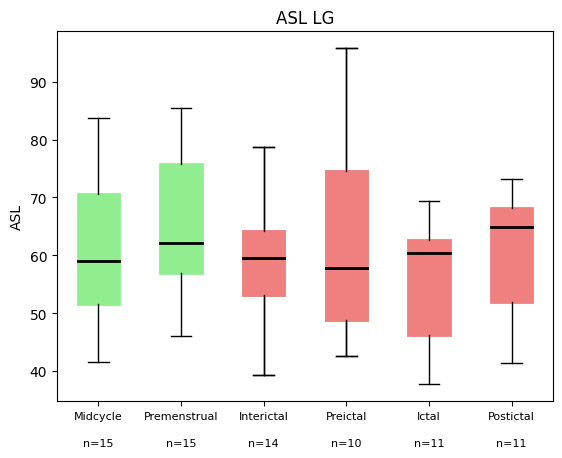

Midcycle vs Interictal for Cb (Welch): p-value = 0.34006
Premenstrual vs Preictal for Cb: p-value = 0.65043
Premenstrual vs Ictal for Cb: p-value = 0.09849
Premenstrual vs Postictal for Cb (Welch): p-value = 0.43543
Midcycle vs Premenstrual for Cb: p-value = 0.50627


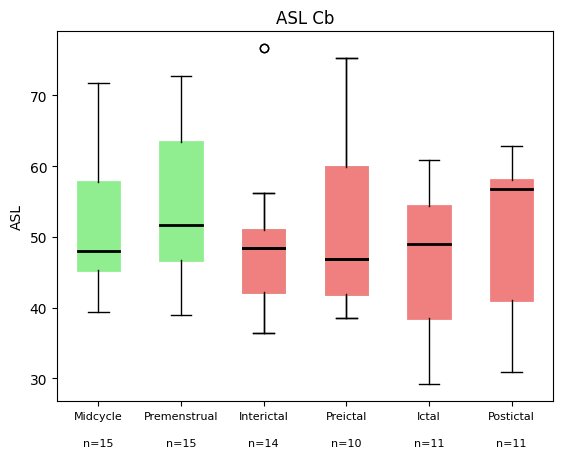

Midcycle vs Interictal for Ramyg: p-value = 0.29882
Premenstrual vs Preictal for Ramyg: p-value = 0.95624
Premenstrual vs Ictal for Ramyg: p-value = 0.04493
Premenstrual vs Postictal for Ramyg: p-value = 0.23690
Midcycle vs Premenstrual for Ramyg: p-value = 0.25869


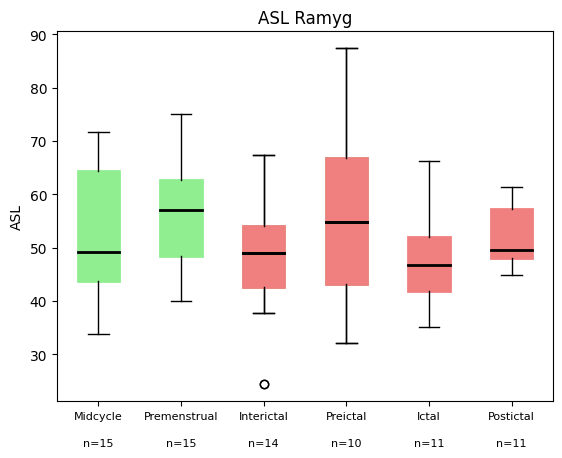

Midcycle vs Interictal for Lamyg: p-value = 0.11452
Premenstrual vs Preictal for Lamyg (Welch): p-value = 0.83161
Premenstrual vs Ictal for Lamyg (Welch): p-value = 0.18808
Premenstrual vs Postictal for Lamyg (Welch): p-value = 0.20897
Midcycle vs Premenstrual for Lamyg (Wilcoxon): p-value = 0.52448


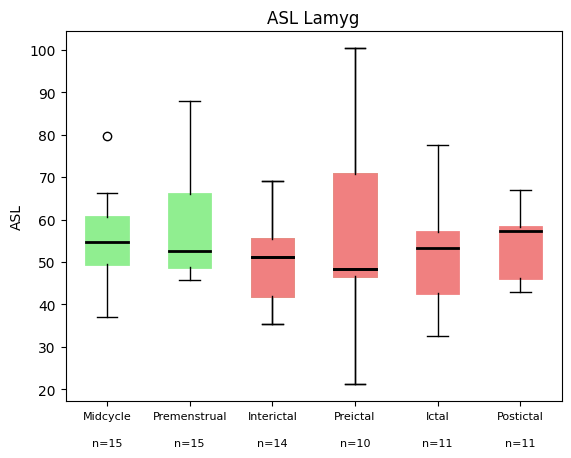

Midcycle vs Interictal for Rthal: p-value = 0.56688
Premenstrual vs Preictal for Rthal: p-value = 0.41966
Premenstrual vs Ictal for Rthal: p-value = 0.04706
Premenstrual vs Postictal for Rthal: p-value = 0.18886
Midcycle vs Premenstrual for Rthal: p-value = 0.11948


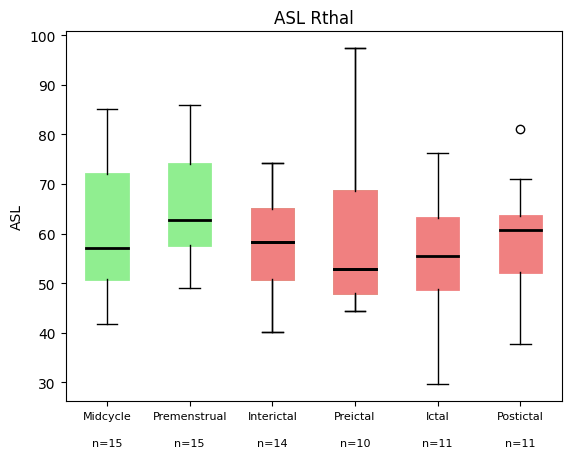

Midcycle vs Interictal for Lthal: p-value = 0.64995
Premenstrual vs Preictal for Lthal (Welch): p-value = 0.67015
Premenstrual vs Ictal for Lthal (Welch): p-value = 0.11452
Premenstrual vs Postictal for Lthal (Welch): p-value = 0.34508
Midcycle vs Premenstrual for Lthal (Wilcoxon): p-value = 0.35913


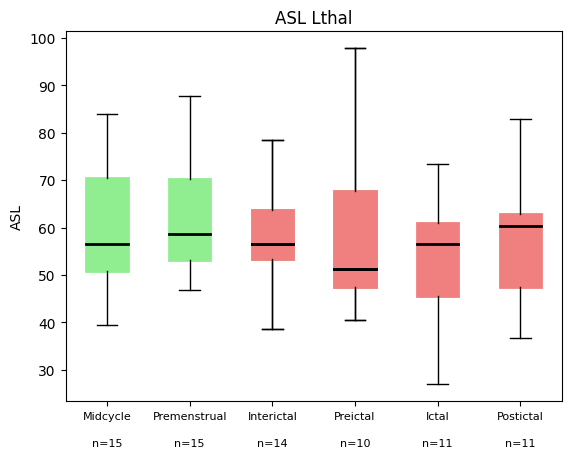

Midcycle vs Interictal for Brainstem (Welch): p-value = 0.95467
Premenstrual vs Preictal for Brainstem: p-value = 0.52691
Premenstrual vs Ictal for Brainstem: p-value = 0.09389
Premenstrual vs Postictal for Brainstem: p-value = 0.47430
Midcycle vs Premenstrual for Brainstem: p-value = 0.32224


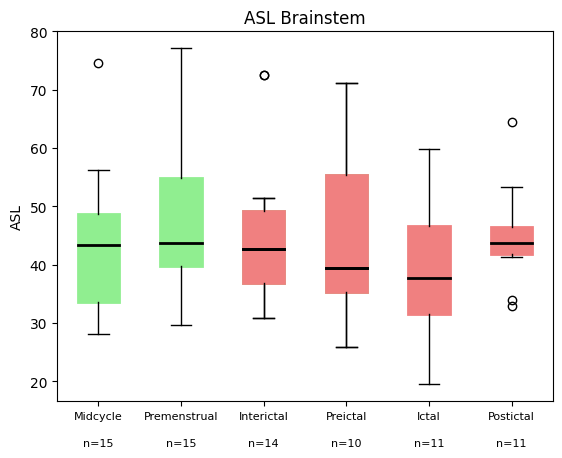

Midcycle vs Interictal for Rputamen: p-value = 0.34956
Premenstrual vs Preictal for Rputamen: p-value = 0.31388
Premenstrual vs Ictal for Rputamen: p-value = 0.02952
Premenstrual vs Postictal for Rputamen: p-value = 0.01478
Midcycle vs Premenstrual for Rputamen: p-value = 0.39275


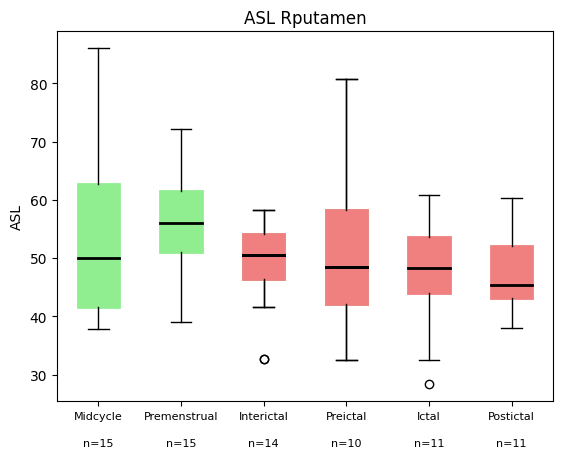

Midcycle vs Interictal for Lputamen: p-value = 0.29798
Premenstrual vs Preictal for Lputamen: p-value = 0.46112
Premenstrual vs Ictal for Lputamen: p-value = 0.26082
Premenstrual vs Postictal for Lputamen: p-value = 0.15734
Midcycle vs Premenstrual for Lputamen: p-value = 0.77064


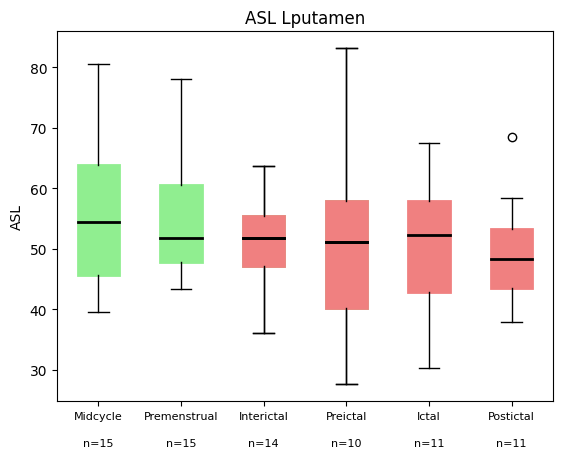

Midcycle vs Interictal for FG: p-value = 0.43861
Premenstrual vs Preictal for FG: p-value = 0.94369
Premenstrual vs Ictal for FG: p-value = 0.16149
Premenstrual vs Postictal for FG: p-value = 0.47267
Midcycle vs Premenstrual for FG: p-value = 0.47830


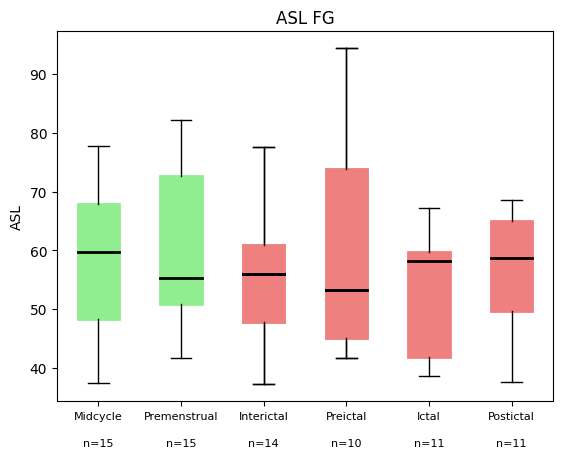

Midcycle vs Interictal for OIL: p-value = 0.27509
Premenstrual vs Preictal for OIL: p-value = 0.96185
Premenstrual vs Ictal for OIL: p-value = 0.37012
Premenstrual vs Postictal for OIL: p-value = 0.68213
Midcycle vs Premenstrual for OIL: p-value = 0.69529


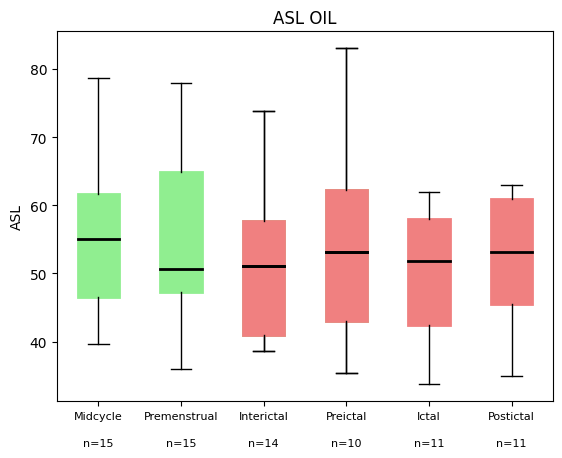

Midcycle vs Interictal for OIR: p-value = 0.62146
Premenstrual vs Preictal for OIR: p-value = 0.76498
Premenstrual vs Ictal for OIR: p-value = 0.20815
Premenstrual vs Postictal for OIR: p-value = 0.45591
Midcycle vs Premenstrual for OIR: p-value = 0.39131


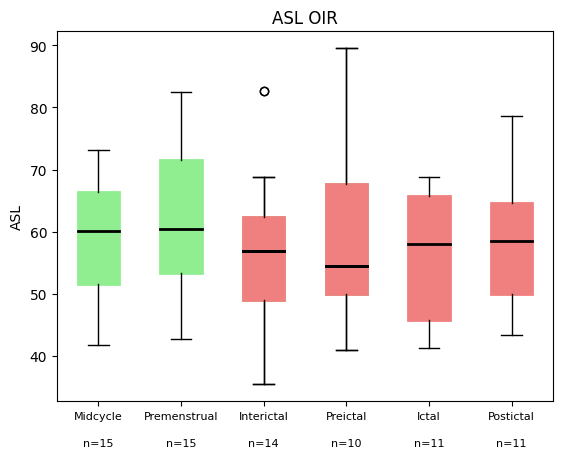

Midcycle vs Interictal for OML: p-value = 0.66247
Premenstrual vs Preictal for OML: p-value = 0.70373
Premenstrual vs Ictal for OML: p-value = 0.10578
Premenstrual vs Postictal for OML: p-value = 0.44808
Midcycle vs Premenstrual for OML: p-value = 0.20048


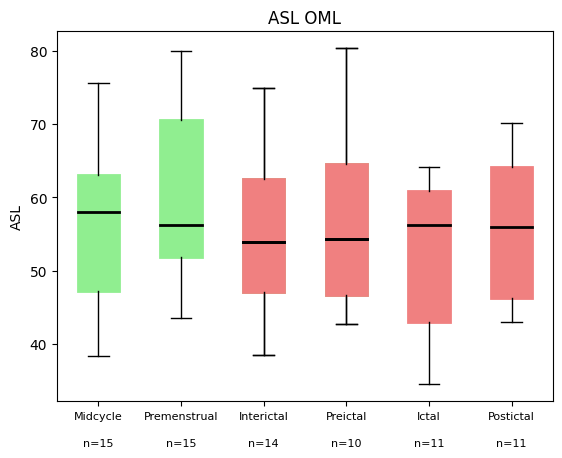

Midcycle vs Interictal for OMR: p-value = 0.63898
Premenstrual vs Preictal for OMR (Welch): p-value = 0.70058
Premenstrual vs Ictal for OMR: p-value = 0.11678
Premenstrual vs Postictal for OMR: p-value = 0.40767
Midcycle vs Premenstrual for OMR: p-value = 0.12936


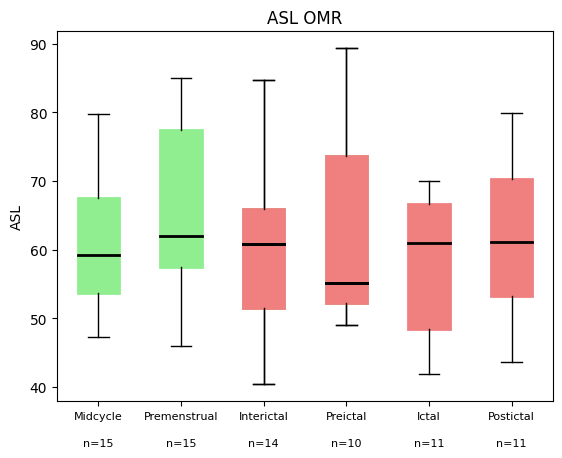

In [11]:
all_roisresults = []
for i in range(len(ROI_names)):
    data = [allROIsASL_mid[i],allROIsASL_premens[i],allROIsASL_int[i],allROIsASL_preict[i],allROIsASL_ict[i],allROIsASL_postict[i]]

    ttest_res = all_stats(data, ROI_names[i])

    all_roisresults += [ttest_res]


    plot_boxplot(data,ROI_names[i],"ASL")

In [12]:
print(all_roisresults)
print(len(all_roisresults))

[[0.6235294548118449, 0.4059072757661073, 0.03552464307605147, 0.1594351584246992, 0.39401901997027167], [0.2119040961172425, 0.9651694705134901, 0.13656261670500502, 0.23166278436525253, 0.5358240074202604], [0.4904438328928127, 0.9932764103998482, 0.10272804218163607, 0.40780639419745923, 0.4227565235797833], [0.27443015760816036, 0.49890496015917096, 0.07748188086300369, 0.18436814217415348, 0.8439143223288796], [0.21931190277604093, 0.6367703079748479, 0.09197668658652591, 0.27113493489125434, 0.905790643226502], [0.48104259080460265, 0.8641162260781523, 0.15129708207464232, 0.558220100096582, 0.6495948882166747], [0.45476783577674973, 0.6081767319442029, 0.12256239093348428, 0.1688105499865588, 0.43162246289339323], [0.2678349792692148, 0.9459271462349488, 0.047290707603109494, 0.5689823233247904, 0.8881297649024347], [0.53821055710282, 0.6436675735565314, 0.06014883586858786, 0.3094688292478308, 0.19061967897148893], [0.34006367741565324, 0.6504263430132851, 0.09848543338628402, 

## Multiple comparisons correction

In [21]:
midvintASL, premvpreASL, premvictASL, premvpostASL, midvpremASL = organize_pvaluesalt(all_roisresults)
print(midvintASL)
print(len(midvintASL))

[0.6235294548118449, 0.2119040961172425, 0.4904438328928127, 0.27443015760816036, 0.21931190277604093, 0.48104259080460265, 0.45476783577674973, 0.2678349792692148, 0.53821055710282, 0.34006367741565324, 0.2988222380189268, 0.11452487618113127, 0.5668761387668082, 0.649948919038378, 0.9546703133518573, 0.3495579995066834, 0.29797929504657716, 0.4386083207379222, 0.27509260957525217, 0.6214593318929147, 0.6624677625443454, 0.63897919980149]
22


Check which are significant before correction

In [24]:
sig_midvintASL = is_sig(midvintASL,ROI_names,"Midcycle vs Interictal")
sig_premvpreASL = is_sig(premvpreASL,ROI_names,"Premenstrual vs Preictal")
sig_premvictASL = is_sig(premvictASL, ROI_names, "Premenstrual vs Ictal")
sig_premvpostASL = is_sig(premvpostASL,ROI_names,"Premenstrual vs Postictal")
sig_midvpremASL = is_sig(midvpremASL,ROI_names,"Midcycle vs Premenstrual")

Premenstrual vs Ictal is significant in Hypothalamus
Premenstrual vs Ictal is significant in MFG
Premenstrual vs Ictal is significant in Ramyg
Premenstrual vs Ictal is significant in Rthal
Premenstrual vs Ictal is significant in Rputamen
Premenstrual vs Postictal is significant in Rputamen


1st Level Correction (n is the number of ROIs)

In [31]:
# fdr

checkmidvintASL = multipletests(midvintASL,method='fdr_bh')
checkpremvpreASL = multipletests(premvpreASL, method='fdr_bh')
checkpremvictASL = multipletests(premvictASL,method='fdr_bh')
checkpremvpostASL = multipletests(premvpostASL, method='fdr_bh')
checkmidvpremASL = multipletests(midvpremASL,method='fdr_bh')

# check if any remain significant

corr_sigmidvintASL = is_sig(checkmidvintASL[1],ROI_names,"Midcycle vs Premenstrual")
corr_sigpremvpre = is_sig(checkpremvpreASL[1],ROI_names,"Premenstrual vs Preictal")
corr_sigpremvictASL = is_sig(checkpremvictASL[1], ROI_names, "Premenstrual vs Ictal")
corr_sigpremvpostASL = is_sig(checkpremvpostASL[1],ROI_names,"Premenstrual vs Postictal")
corr_sigmidvpremASL = is_sig(checkmidvpremASL[1],ROI_names,"Midcycle vs Premenstrual")

In [35]:
# same but with bonferroni

checkmidvintASL = multipletests(midvintASL, method='bonferroni')
checkpremvpreASL = multipletests(premvpreASL, method='bonferroni')
checkpremvictASL = multipletests(premvictASL, method='bonferroni')
checkpremvpostASL = multipletests(premvpostASL, method='bonferroni')
checkmidvpremASL = multipletests(midvpremASL, method='bonferroni')

corr_sigmidvintASL = is_sig(checkmidvintASL[1], ROI_names, "Midcycle vs Premenstrual")
corr_sigpremvpreASL = is_sig(checkpremvpreASL[1], ROI_names, "Premenstrual vs Preictal")
corr_sigpremvictASL = is_sig(checkpremvictASL[1], ROI_names, "Premenstrual vs Ictal")
corr_sigpremvpostASL = is_sig(checkpremvpostASL[1], ROI_names, "Premenstrual vs Postictal")
corr_sigmidvpremASL = is_sig(checkmidvpremASL[1], ROI_names, "Midcycle vs Premenstrual")


None remain signficant after correction

# CVR

In [13]:
allROIsCVR_mid = roi_vasc(CVRcontrols_midcycle,"ses-midcycle","CVR")
allROIsCVR_premens = roi_vasc(CVRcontrols_premens,"ses-premenstrual","CVR")
allROIsCVR_int = roi_vasc(patientsCVR_interictal,"ses-interictal","CVR")
allROIsCVR_preict = roi_vasc(patientsCVR_preictal,"ses-preictal","CVR")
allROIsCVR_ict = roi_vasc(patientsCVR_ictal,"ses-ictal","CVR")
allROIsCVR_postict = roi_vasc(patientsCVR_postictal,"ses-postictal","CVR")

## Check normality

In [14]:
mid_normCVR = norm_test(allROIsCVR_mid,ROI_names,"midcycle")
print('-'*10)
premens_normCVR = norm_test(allROIsCVR_premens,ROI_names,"premenstrual")
print('-'*10)
int_normCVR = norm_test(allROIsCVR_int,ROI_names,"interictal")
print('-'*10)
preict_normCVR = norm_test(allROIsCVR_preict,ROI_names,"preictal")
print('-'*10)
ict_normCVR = norm_test(allROIsCVR_ict,ROI_names,"ictal")
print('-'*10)
postict_normCVR = norm_test(allROIsCVR_postict,ROI_names,"postictal")

ROI ACC session midcycle does not have normal distribution
ROI MCC session midcycle does not have normal distribution
ROI MFG session midcycle does not have normal distribution
ROI Lputamen session midcycle does not have normal distribution
----------
ROI Hypothalamus session premenstrual does not have normal distribution
ROI Ramyg session premenstrual does not have normal distribution
ROI Lamyg session premenstrual does not have normal distribution
ROI Lthal session premenstrual does not have normal distribution
----------
----------
ROI Insula session preictal does not have normal distribution
ROI Lputamen session preictal does not have normal distribution
ROI OMR session preictal does not have normal distribution
----------
ROI Ramyg session ictal does not have normal distribution
----------


## Results + stats

Midcycle vs Interictal for Hypothalamus: p-value = 0.67423
Premenstrual vs Preictal for Hypothalamus (Welch): p-value = 0.74660
Premenstrual vs Ictal for Hypothalamus (Welch): p-value = 0.43755
Premenstrual vs Postictal for Hypothalamus (Welch): p-value = 0.51548
Midcycle vs Premenstrual for Hypothalamus (Welch): p-value = 0.55853


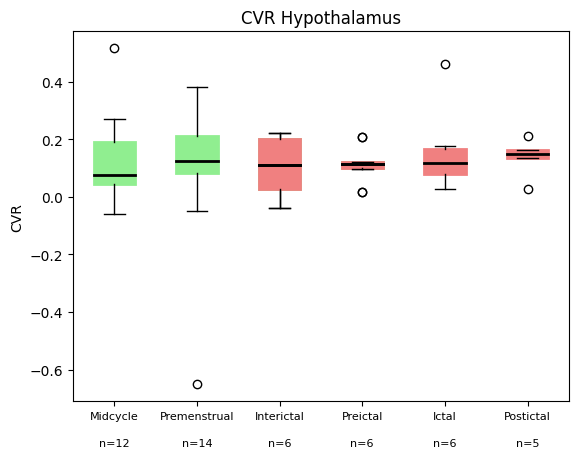

Midcycle vs Interictal for aPHG: p-value = 0.31518
Premenstrual vs Preictal for aPHG: p-value = 0.13431
Premenstrual vs Ictal for aPHG: p-value = 0.14933
Premenstrual vs Postictal for aPHG: p-value = 0.93097
Midcycle vs Premenstrual for aPHG: p-value = 0.44015


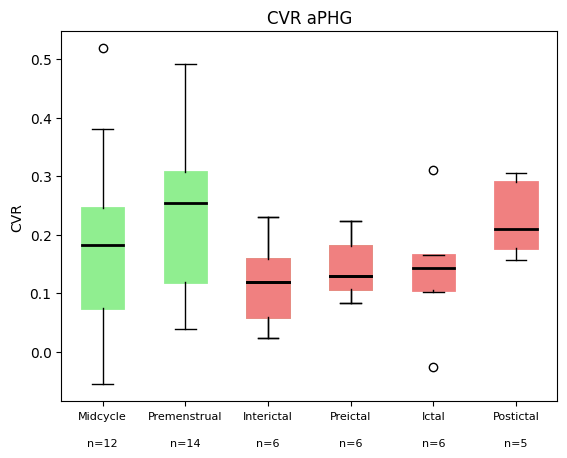

Midcycle vs Interictal for pPHG: p-value = 0.17501
Premenstrual vs Preictal for pPHG: p-value = 0.07371
Premenstrual vs Ictal for pPHG: p-value = 0.16885
Premenstrual vs Postictal for pPHG: p-value = 0.43487
Midcycle vs Premenstrual for pPHG: p-value = 0.47584


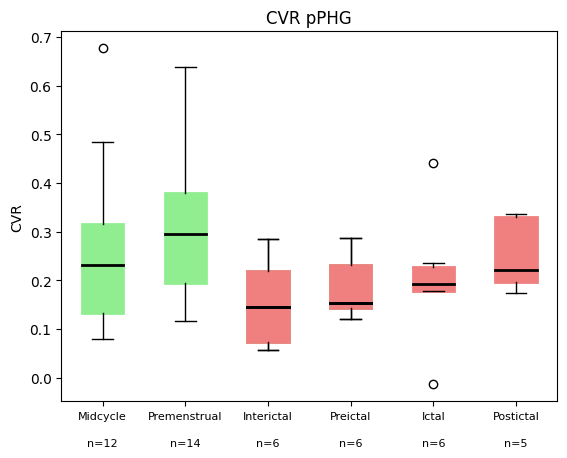

Midcycle vs Interictal for ACC (Welch): p-value = 0.35677
Premenstrual vs Preictal for ACC: p-value = 0.08564
Premenstrual vs Ictal for ACC: p-value = 0.27166
Premenstrual vs Postictal for ACC: p-value = 0.44617
Midcycle vs Premenstrual for ACC (Welch): p-value = 0.25155


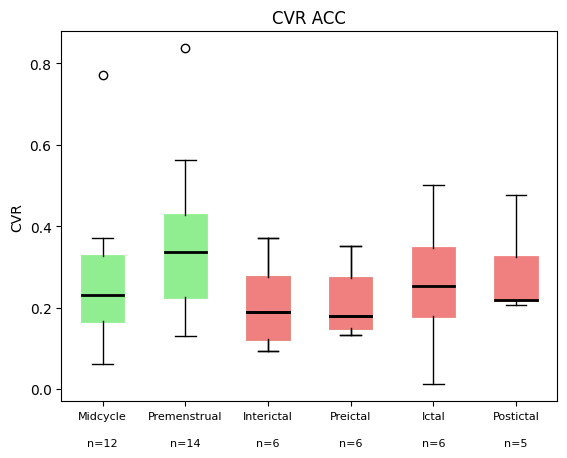

Midcycle vs Interictal for MCC (Welch): p-value = 0.10393
Premenstrual vs Preictal for MCC: p-value = 0.08518
Premenstrual vs Ictal for MCC: p-value = 0.26531
Premenstrual vs Postictal for MCC: p-value = 0.39542
Midcycle vs Premenstrual for MCC (Welch): p-value = 0.36192


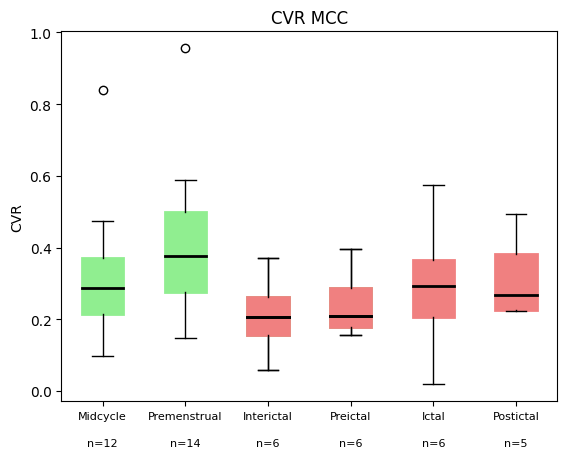

Midcycle vs Interictal for PCC: p-value = 0.24603
Premenstrual vs Preictal for PCC: p-value = 0.08836
Premenstrual vs Ictal for PCC: p-value = 0.26449
Premenstrual vs Postictal for PCC: p-value = 0.45789
Midcycle vs Premenstrual for PCC: p-value = 0.79946


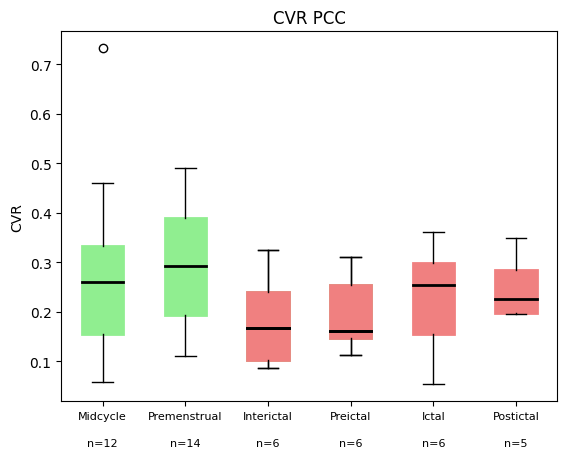

Midcycle vs Interictal for Insula: p-value = 0.15059
Premenstrual vs Preictal for Insula (Welch): p-value = 0.04032
Premenstrual vs Ictal for Insula: p-value = 0.22390
Premenstrual vs Postictal for Insula: p-value = 0.42390
Midcycle vs Premenstrual for Insula: p-value = 0.41061


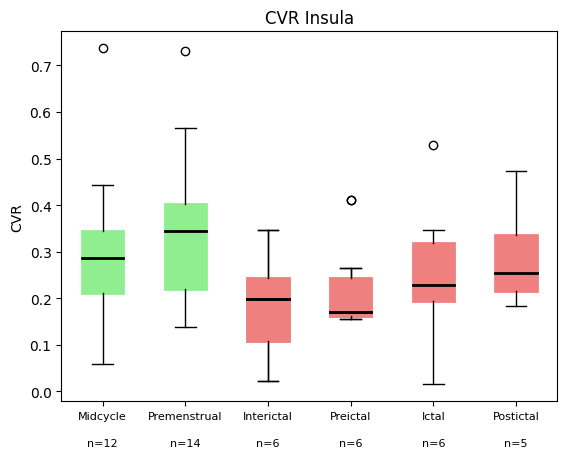

Midcycle vs Interictal for MFG (Welch): p-value = 0.10788
Premenstrual vs Preictal for MFG: p-value = 0.07321
Premenstrual vs Ictal for MFG: p-value = 0.16964
Premenstrual vs Postictal for MFG: p-value = 0.35196
Midcycle vs Premenstrual for MFG (Welch): p-value = 0.40230


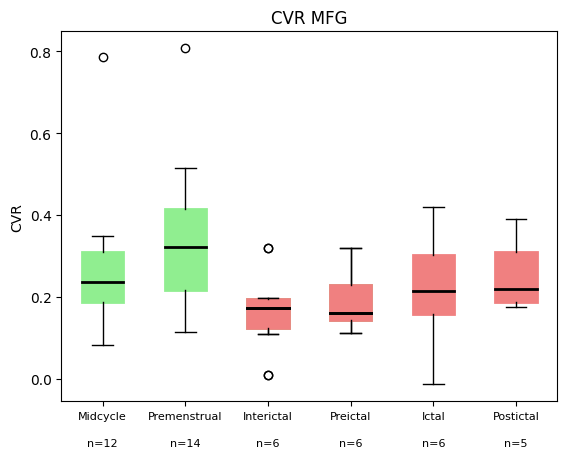

Midcycle vs Interictal for LG: p-value = 0.10541
Premenstrual vs Preictal for LG: p-value = 0.06808
Premenstrual vs Ictal for LG: p-value = 0.25344
Premenstrual vs Postictal for LG: p-value = 0.49254
Midcycle vs Premenstrual for LG: p-value = 0.48419


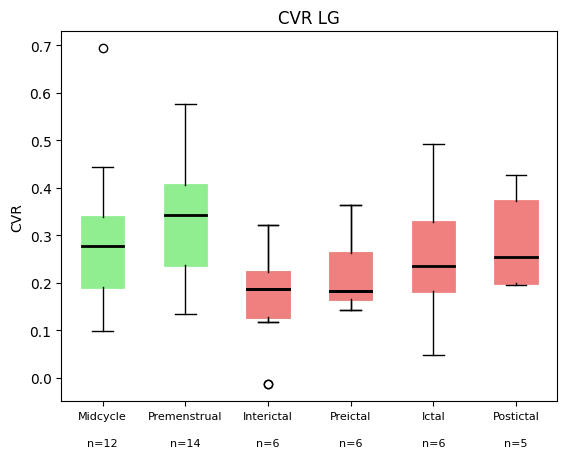

Midcycle vs Interictal for Cb: p-value = 0.16030
Premenstrual vs Preictal for Cb: p-value = 0.43156
Premenstrual vs Ictal for Cb: p-value = 0.48782
Premenstrual vs Postictal for Cb: p-value = 0.92707
Midcycle vs Premenstrual for Cb: p-value = 0.97827


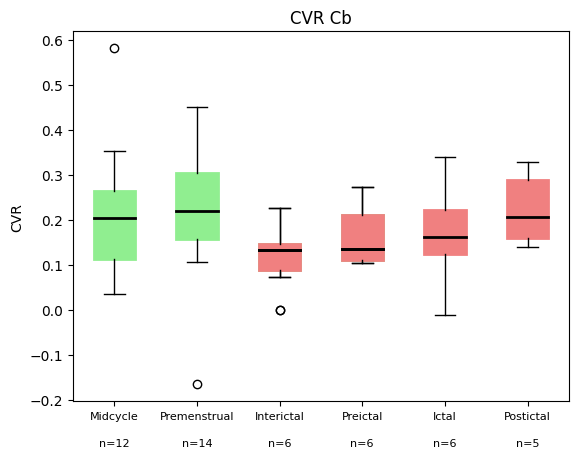

Midcycle vs Interictal for Ramyg: p-value = 0.50362
Premenstrual vs Preictal for Ramyg (Welch): p-value = 0.06161
Premenstrual vs Ictal for Ramyg (Welch): p-value = 0.23017
Premenstrual vs Postictal for Ramyg (Welch): p-value = 0.93295
Midcycle vs Premenstrual for Ramyg (Welch): p-value = 0.39906


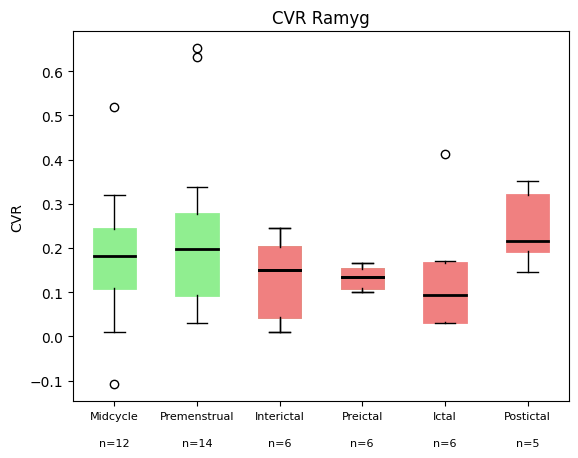

Midcycle vs Interictal for Lamyg: p-value = 0.32860
Premenstrual vs Preictal for Lamyg (Welch): p-value = 0.05715
Premenstrual vs Ictal for Lamyg (Welch): p-value = 0.34953
Premenstrual vs Postictal for Lamyg (Welch): p-value = 0.72289
Midcycle vs Premenstrual for Lamyg (Welch): p-value = 0.50682


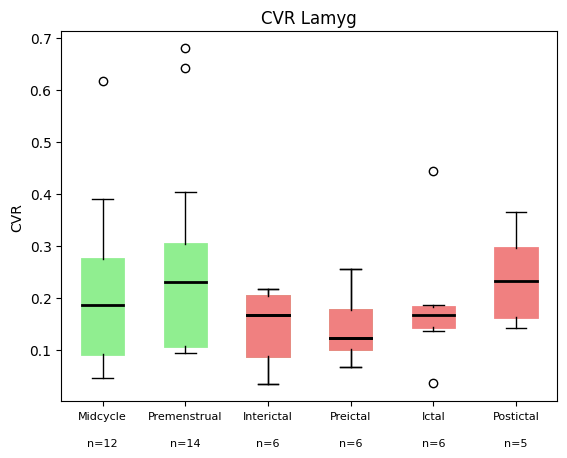

Midcycle vs Interictal for Rthal: p-value = 0.18190
Premenstrual vs Preictal for Rthal: p-value = 0.10734
Premenstrual vs Ictal for Rthal: p-value = 0.17803
Premenstrual vs Postictal for Rthal: p-value = 0.43927
Midcycle vs Premenstrual for Rthal: p-value = 0.53784


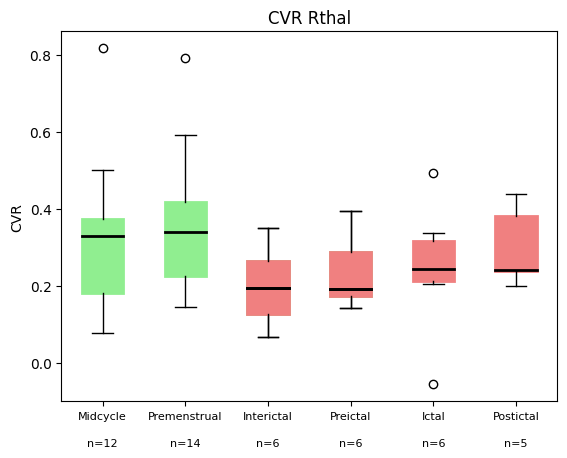

Midcycle vs Interictal for Lthal: p-value = 0.17112
Premenstrual vs Preictal for Lthal (Welch): p-value = 0.05084
Premenstrual vs Ictal for Lthal (Welch): p-value = 0.25027
Premenstrual vs Postictal for Lthal (Welch): p-value = 0.43174
Midcycle vs Premenstrual for Lthal (Welch): p-value = 0.55491


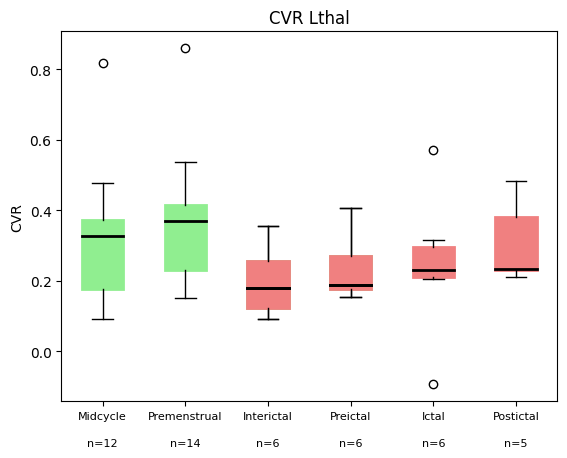

Midcycle vs Interictal for Brainstem: p-value = 0.22219
Premenstrual vs Preictal for Brainstem: p-value = 0.32513
Premenstrual vs Ictal for Brainstem: p-value = 0.31568
Premenstrual vs Postictal for Brainstem: p-value = 0.86175
Midcycle vs Premenstrual for Brainstem: p-value = 0.82200


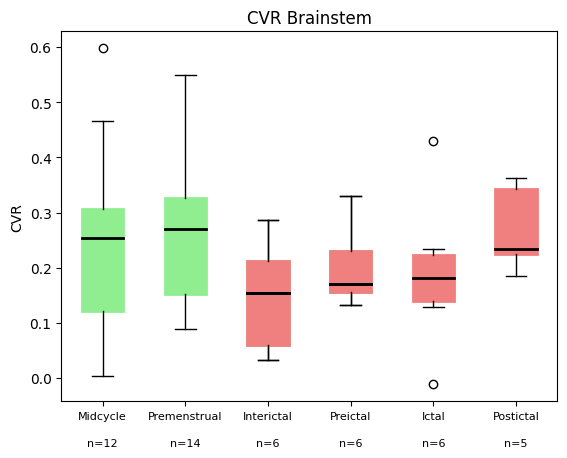

Midcycle vs Interictal for Rputamen: p-value = 0.19471
Premenstrual vs Preictal for Rputamen: p-value = 0.03283
Premenstrual vs Ictal for Rputamen: p-value = 0.20124
Premenstrual vs Postictal for Rputamen: p-value = 0.34028
Midcycle vs Premenstrual for Rputamen: p-value = 0.43164


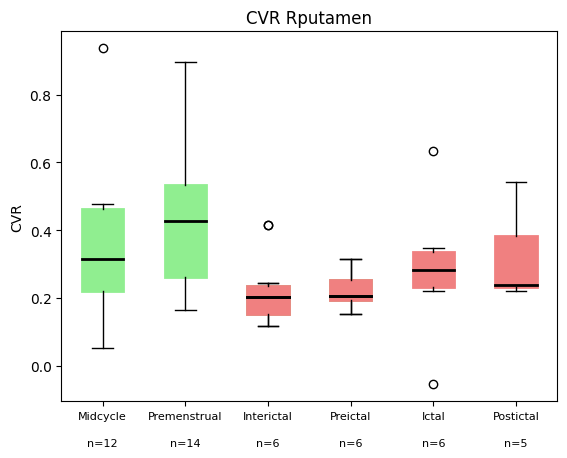

Midcycle vs Interictal for Lputamen (Welch): p-value = 0.12760
Premenstrual vs Preictal for Lputamen (Welch): p-value = 0.00606
Premenstrual vs Ictal for Lputamen: p-value = 0.16977
Premenstrual vs Postictal for Lputamen: p-value = 0.49583
Midcycle vs Premenstrual for Lputamen (Welch): p-value = 0.38222


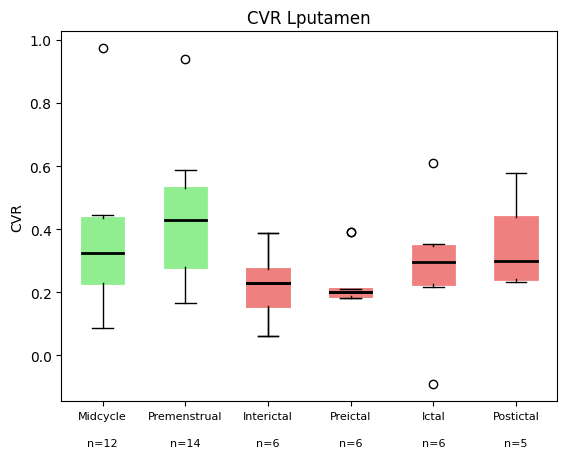

Midcycle vs Interictal for FG: p-value = 0.20786
Premenstrual vs Preictal for FG: p-value = 0.07879
Premenstrual vs Ictal for FG: p-value = 0.18057
Premenstrual vs Postictal for FG: p-value = 0.63544
Midcycle vs Premenstrual for FG: p-value = 0.50490


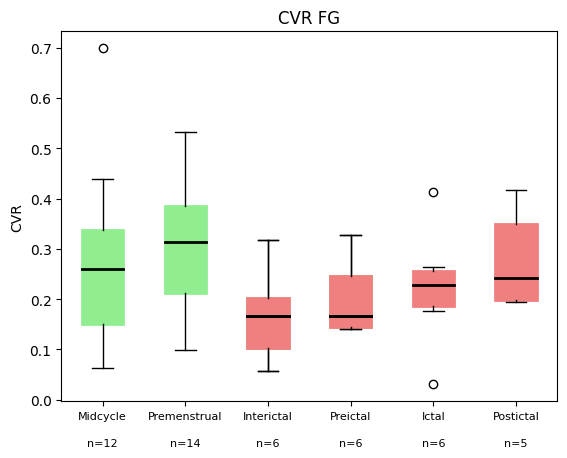

Midcycle vs Interictal for OIL: p-value = 0.16797
Premenstrual vs Preictal for OIL: p-value = 0.10510
Premenstrual vs Ictal for OIL: p-value = 0.36786
Premenstrual vs Postictal for OIL: p-value = 0.39398
Midcycle vs Premenstrual for OIL: p-value = 0.44767


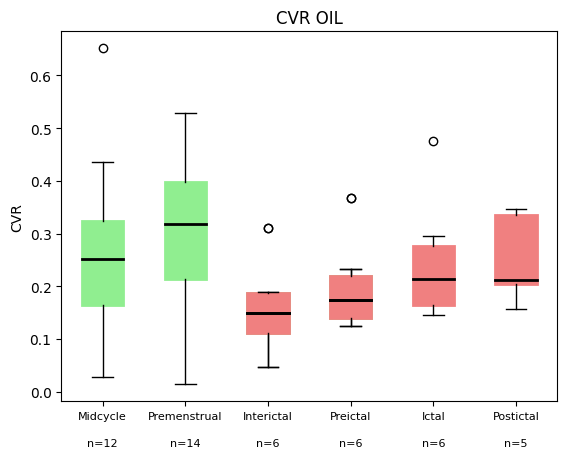

Midcycle vs Interictal for OIR: p-value = 0.27735
Premenstrual vs Preictal for OIR: p-value = 0.09672
Premenstrual vs Ictal for OIR: p-value = 0.17613
Premenstrual vs Postictal for OIR: p-value = 0.68038
Midcycle vs Premenstrual for OIR: p-value = 0.48159


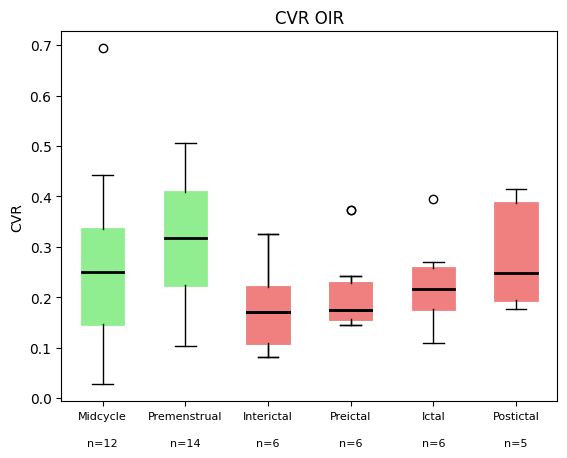

Midcycle vs Interictal for OML: p-value = 0.20981
Premenstrual vs Preictal for OML: p-value = 0.07594
Premenstrual vs Ictal for OML: p-value = 0.25855
Premenstrual vs Postictal for OML: p-value = 0.32689
Midcycle vs Premenstrual for OML: p-value = 0.36630


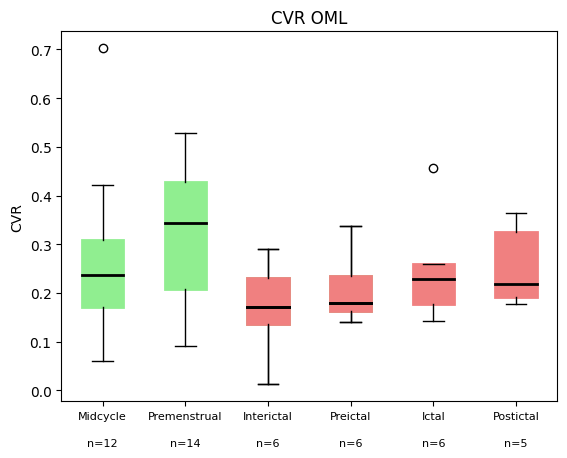

Midcycle vs Interictal for OMR: p-value = 0.23670
Premenstrual vs Preictal for OMR (Welch): p-value = 0.07566
Premenstrual vs Ictal for OMR: p-value = 0.17815
Premenstrual vs Postictal for OMR: p-value = 0.50271
Midcycle vs Premenstrual for OMR: p-value = 0.26920


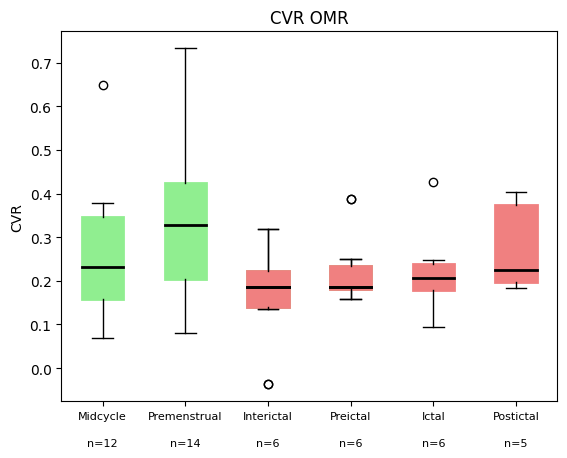

In [15]:
all_roisresultsCVR = []
for i in range(len(ROI_names)):
    data = [allROIsCVR_mid[i],allROIsCVR_premens[i],allROIsCVR_int[i],allROIsCVR_preict[i],allROIsCVR_ict[i],allROIsCVR_postict[i]]

    ttest_res = all_statsCVR(data,ROI_names[i])

    all_roisresultsCVR += [ttest_res]

    plot_boxplot(data,ROI_names[i],"CVR")

## Multiple Comparisons Correction

In [33]:
midvintCVR, premvpreCVR, premvictCVR, premvpostCVR, midvpremCVR = organize_pvaluesalt(all_roisresultsCVR)
print(len(all_roisresultsCVR))


22


In [34]:
sig_midvintCVR = is_sig(midvintCVR,ROI_names,"Midcycle vs Interictal")
sig_premvpreCVR = is_sig(premvpreCVR,ROI_names,"Premenstrual vs Preictal")
sig_premvictCVR = is_sig(premvictCVR, ROI_names, "Premenstrual vs Ictal")
sig_premvpostCVR = is_sig(premvpostCVR,ROI_names,"Premenstrual vs Postictal")
sig_midvpremCVR = is_sig(midvpremCVR,ROI_names,"Midcycle vs Premenstrual")

Premenstrual vs Preictal is significant in Insula
Premenstrual vs Preictal is significant in Rputamen
Premenstrual vs Preictal is significant in Lputamen


In [36]:
# fdr

checkmidvintCVR = multipletests(midvintCVR, method='fdr_bh')
checkpremvpreCVR = multipletests(premvpreCVR, method='fdr_bh')
checkpremvictCVR = multipletests(premvictCVR, method='fdr_bh')
checkpremvpostCVR = multipletests(premvpostCVR, method='fdr_bh')
checkmidvpremCVR = multipletests(midvpremCVR, method='fdr_bh')

# check if any remain significant

corr_sigmidvintCVR = is_sig(checkmidvintCVR[1], ROI_names, "Midcycle vs Premenstrual")
corr_sigpremvpreCVR = is_sig(checkpremvpreCVR[1], ROI_names, "Premenstrual vs Preictal")
corr_sigpremvictCVR = is_sig(checkpremvictCVR[1], ROI_names, "Premenstrual vs Ictal")
corr_sigpremvpostCVR = is_sig(checkpremvpostCVR[1], ROI_names, "Premenstrual vs Postictal")
corr_sigmidvpremCVR = is_sig(checkmidvpremCVR[1], ROI_names, "Midcycle vs Premenstrual")


In [43]:
print(len(premvpreCVR)==len(checkpremvpreCVR[1]))

True


In [37]:
# with bonferroni

checkmidvintCVR = multipletests(midvintCVR, method='bonferroni')
checkpremvpreCVR = multipletests(premvpreCVR, method='bonferroni')
checkpremvictCVR = multipletests(premvictCVR, method='bonferroni')
checkpremvpostCVR = multipletests(premvpostCVR, method='bonferroni')
checkmidvpremCVR = multipletests(midvpremCVR, method='bonferroni')

# check if any remain significant

corr_sigmidvintCVR = is_sig(checkmidvintCVR[1], ROI_names, "Midcycle vs Premenstrual")
corr_sigpremvpreCVR = is_sig(checkpremvpreCVR[1], ROI_names, "Premenstrual vs Preictal")
corr_sigpremvictCVR = is_sig(checkpremvictCVR[1], ROI_names, "Premenstrual vs Ictal")
corr_sigpremvpostCVR = is_sig(checkpremvpostCVR[1], ROI_names, "Premenstrual vs Postictal")
corr_sigmidvpremCVR = is_sig(checkmidvpremCVR[1], ROI_names, "Midcycle vs Premenstrual")
